<a href="https://colab.research.google.com/github/nhannguyen0108/Data-Science/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Project: Titanic - Machine Learning from Disaster***

***Table of Content***

 - 1. Introduction
 - 2. Loading the data
 - 3. Exploring Data Analysis (EDA)
 - 4. Feature Engineering & Data Wrangling



###1. Introduction###
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912 during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of lick involved in surviving the sinking, some groups of people were more likely to survive thatn others, such as women, children, and the upper-class.

In this challenge, I will complete the analysis of what sorts of people were likely to survive. In particular, I will apply tool of machine learning to predict which passengers survived the tragedy.

###2. Loading the Data

In [1]:
#import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Notes:
*   SibSp: # of siblings / spouses aboard the Titanic
*   Parch: 	# of parents / children aboard the Titanic
*   Ticket: Ticket number
*   Cabin: Cabin number



In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop("PassengerId", axis =1, inplace=True)

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_df.set_index(test_df.PassengerId, inplace=True)

In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test_df.drop("PassengerId", axis = 1, inplace=True)

In [14]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


**1. Feature Classification: Categorical(Phân loại) vs Numerical(Số)**
* This helps us select the appropriate plots for visualization.

  Which features are categorical?
  * Categorical Features: nominal, ordinal, ratio, interval
  * To classify the samples into sets of similar samples

  Which features are numerical?
  * Numerical features: discrete, continuous or timeseries
  * These values change from sample to sample



In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


*   Categorical: Survived, Sex, Embarked, Pclass(ordinal), SibSp, Parch
*   Numerical: (continuous) Age, Fare (discrete)
*   Mix types of data: Ticket, Cabin
*   Contain Error/Typo: Name
*   Blank or Null: Cabin > Age > Embarked
*   Various Data Type: String, Int, Float




In [17]:
train_df['Survived']= train_df['Survived'].astype('category')

In [18]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [20]:
features = {"Pclass", "Sex", "SibSp", "Parch", "Embarked"}
def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


**Distribution of Numerical feature values across the samples**

In [22]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**Distibution of Categorical feature values across the sample**

In [23]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


3. Exploring Data Analysis (EDA)
- Correlation categorical features
  *   Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch

- Target Variable: Survived




In [24]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [25]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance.

###'Sex'


In [26]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


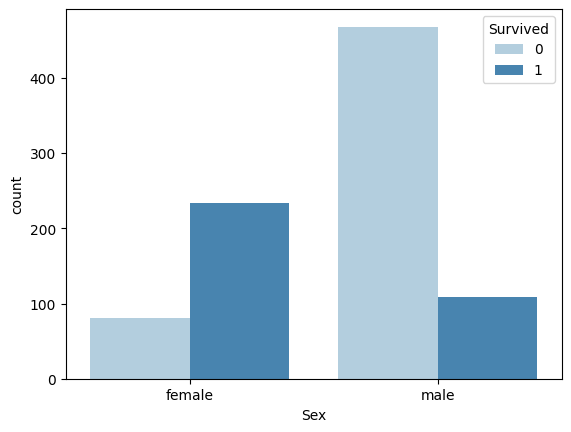

In [27]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette ='Blues');

- Remaining Categorical Feature Columns

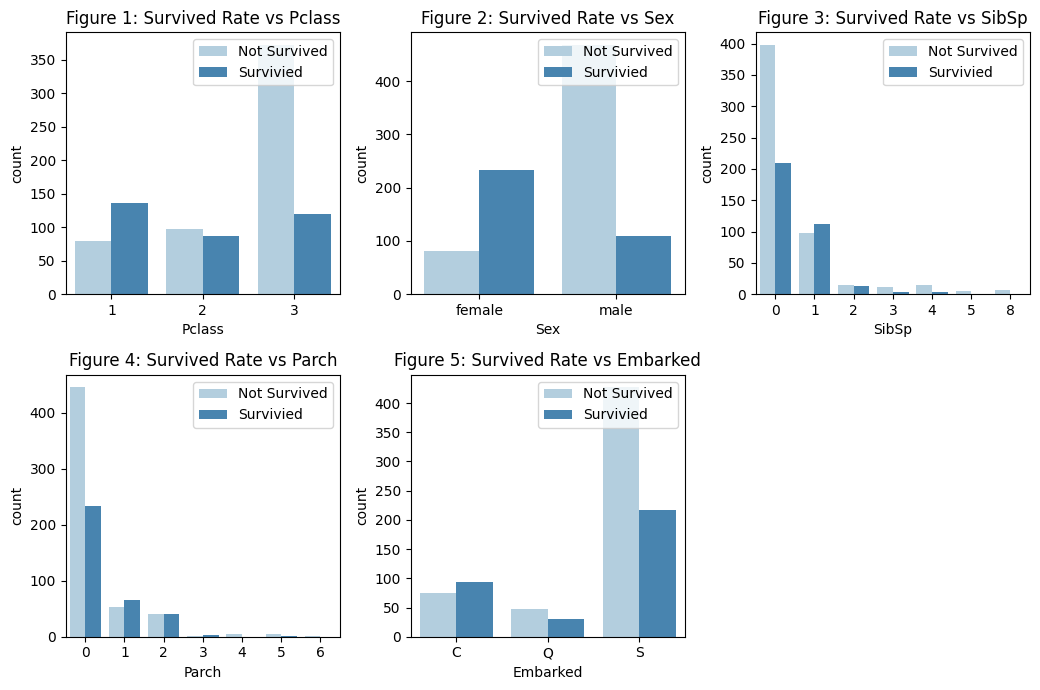

In [28]:
cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c #index to loop through list 'cols'
    if i < len(cols):
      ax_i = ax[r,c]
      sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
      ax_i.set_title(f'Figure {i+1}: Survived Rate vs {cols[i]}')
      ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survivied'])
ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()

Observation:
* Survival Rate:
  * Fig 1: 1st class higher survival rate
  * Fig 2: Female highrt survival rate
  * Fig 3: People going with 0 Siblings are mostly not survived, the number of passenger with 1-2 family memers has a better chance of survival
  * Fig 4: People going with 0 Parent + Children are mostly not survival
  * Fig 5: Most people embarked at Southamption, and also had the highest people not survived





EDA for Numerical Features

*** Numerical features (continuous) Age, Fare***


***Age***

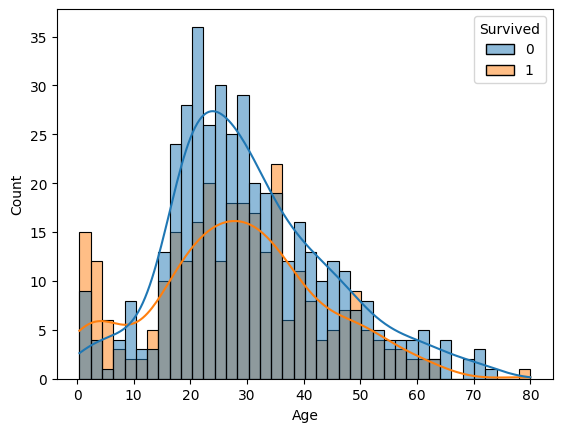

In [29]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins = 40, kde=True);

* Marjority passengers were from 18-40 ages.
* Children had more chance to survive than other ages.

***Fare***

In [30]:
train_df["Fare"].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

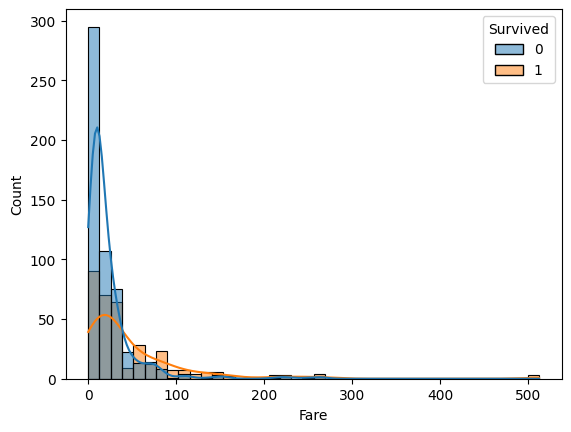

In [31]:
sns.histplot(data=train_df, x="Fare",hue = "Survived", bins = 40, kde=True)

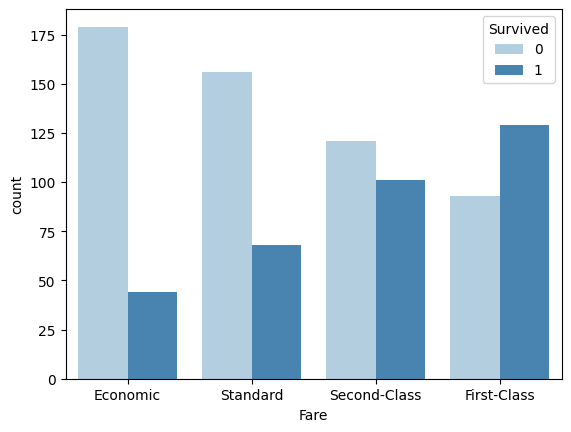

In [32]:
#To name for 0-25% quartile, 25-30, 50-75, 75-100

fare_categories = ["Economic", "Standard", "Second-Class", "First-Class"]
quartitle_data = pd.qcut(train_df["Fare"], 4, labels=fare_categories)

sns.countplot(x=quartitle_data, hue =train_df["Survived"], palette="Blues")
plt.show()

* Distribution of Fare
  *   Fare does not follow a normal distribution and has a huge spike at the price rang [0-$100].
  
  *   The distribution is skewed to the left with 75% of the fare paid under $31

and a max paid fare of $512
* Quartitle plot:
  * Passenger with Luxury & Expensive Fare will have more chance to survive

***4. Feature Engineering & Data Wrangling***

Name
- Regular Expression

In [33]:
train_df["Name"].tail(10)

,Name
PassengerId,
882,"Markun, Mr. Johann"
883,"Dahlberg, Miss. Gerda Ulrika"
884,"Banfield, Mr. Frederick James"
885,"Sutehall, Mr. Henry Jr"
886,"Rice, Mrs. William (Margaret Norton)"
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""
890,"Behr, Mr. Karl Howell"


In [34]:
import re #regular expression
def extract_title(name):
  p = re.compile(r", ([\w\s]+)\.")
#   if p.search(name) is None:
#   print(name)
  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [35]:
train_df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [36]:
test_df['Title'] = test_df['Name'].apply(lambda name:extract_title(name))

In [37]:
test_df['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [38]:
def group_title(title):
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

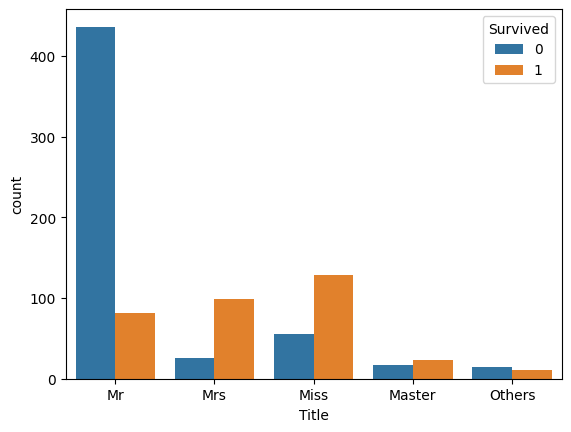

In [39]:
sns.countplot(data=train_df, x='Title', hue='Survived');

***#Family***
***SubSp, Parch

In [40]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') +train_df['Parch'].astype('int') +1

In [41]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') +test_df['Parch'].astype('int') +1

In [42]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large']) #(0,1], (1,4], (4, 6], (6, 20]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large']) #(0,1], (1,4], (4, 6], (6, 20]

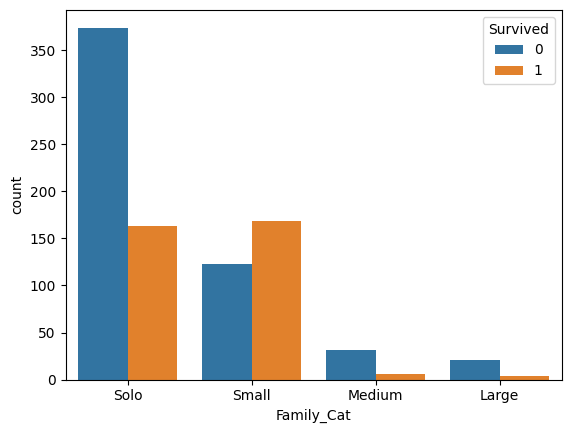

In [43]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

4.2 Data Wrangling

In [44]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [45]:
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      print(f"{col} has {missing_count*100/n_rows: .2f}% missing values")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has  19.87% missing values
Embarked has  0.22% missing values
Age has  20.57% missing values
Fare has  0.24% missing values


###Filling missing values
### Age
- Filling missing values with median of whole dataset

In [46]:
age_by_pclass_sex = train_df.groupby(["Sex","Pclass"],observed=False)['Age'].median()

In [47]:
age_by_pclass_sex

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [48]:
#Filling the missing values in Age with the medians of Sex and Pclass groups
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], observed = False)['Age'].transform(lambda x: x.fillna(x.median()))

In [49]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], observed = False)['Age'].transform(lambda x: x.fillna(x.median()))

In [50]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has  0.22% missing values
Fare has  0.24% missing values


In [51]:
X = train_df[feature_cols]
y = train_df['Survived']

In [52]:
X_test = test_df[feature_cols]


In [53]:
# preprocess Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())

])

cat_transformer = Pipeline(steps = [
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [54]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [55]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

###5. Model Training
**Step 1: Training a Model
  
  Training Data

**Step 2: Tuning Model Hyper - parameters

  Validation Data

***Step 3: Model Performance Conparision

  Test Data

In [56]:
X = preprocessor.transform(X) #x->X_train, X_val

In [57]:
X_test = preprocessor.transform(X_test)

In [70]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [68]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [61]:
X_test.shape

(418, 19)

In [84]:
#binary classification
from sklearn.preprocessing import PolynomialFeatures
#Sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [63]:
log_reg = LogisticRegression(solver='liblinear', max_iter =1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [71]:
log_reg.score(X_val, y_val)

0.8379888268156425

In [65]:
y_pred = log_reg.predict(X_val)

In [66]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7543859649122807, 0.7543859649122807)

In [67]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       122
           1       0.75      0.75      0.75        57

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



- y = a*x1 + b*x2 +b -> y = a*x1^2 +b*x^2 +c x1*x2 + bias

In [73]:
poly = PolynomialFeatures(degree=2)
ploly_features_X_train = poly.fit_transform(X_train)
ploly_features_X_val = poly.transform(X_val)

In [74]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(ploly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [83]:
poly_log_reg.score(ploly_features_X_val, y_val)

0.8547486033519553

In [87]:
#Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [88]:
decision_tree.score(X_val, y_val)

0.8100558659217877

In [89]:
###5.1 Cross -validation

In [90]:
from sklearn.model_selection import cross_val_score

In [92]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring = 'accuracy', cv = 5)

In [94]:
lr_scores.mean(), lr_scores.std()

(np.float64(0.826031008725127), np.float64(0.020466357172416235))

In [95]:
dr_scores = cross_val_score(dt_cv, X, y, scoring = 'accuracy', cv = 5)

In [96]:
dr_scores.mean(), dr_scores.std()

(np.float64(0.8069801016885318), np.float64(0.014586754299604428))

In [97]:
##5.2 Baseline Model Comparision

In [129]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost

seed = 2025
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(eval_metric='logloss', random_state=seed)
]

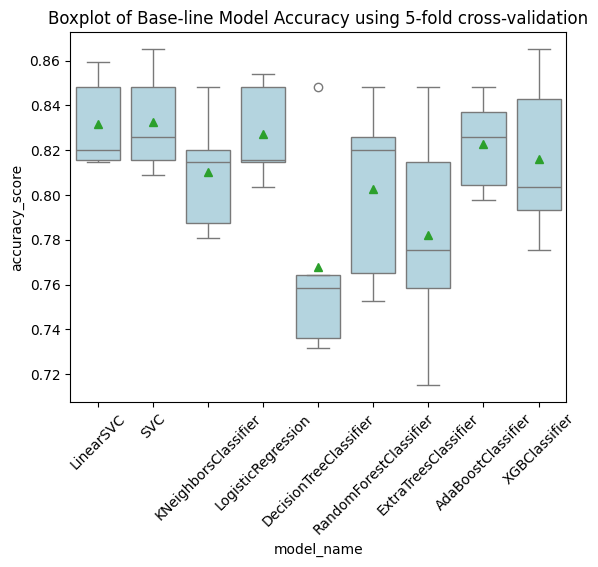

,Mean,Standard Deviation
model_name,,
SVC,0.832791,0.023442
LinearSVC,0.831668,0.020817
LogisticRegression,0.827173,0.022475
AdaBoostClassifier,0.822692,0.021374
XGBClassifier,0.815963,0.036957
KNeighborsClassifier,0.810351,0.027097
RandomForestClassifier,0.802511,0.041250
ExtraTreesClassifier,0.782343,0.051329
DecisionTreeClassifier,0.767717,0.047147


In [133]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
  #define k-fold:
  kfold =StratifiedKFold(cv, shuffle=True, random_state=seed)
  entries = []
  for model in models:
      model_name = model.__class__.__name__
      scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
      for fold_idx, score in enumerate(scores):
          entries.append((model_name, fold_idx, score))

  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy_score'])

  if plot_results:
      sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
      plt.title("Boxplot of Base-line Model Accuracy using 5-fold cross-validation")
      plt.xticks(rotation=45)
      plt.show()

  #Summary réult
  mean = cv_df.groupby('model_name')['accuracy_score'].mean()
  std = cv_df.groupby('model_name')['accuracy_score'].std()

  baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
  baseline_results.columns = ['Mean', 'Standard Deviation']

  #Srot by accuracy
  baseline_results.sort_values(by = ['Mean'], ascending=False, inplace=True)

  return baseline_results


generate_baseline_results(models, X, y, metrics ='accuracy', cv=5, plot_results=True)